<a href="https://colab.research.google.com/github/Iambmed/TSF-Tasks/blob/main/task1_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Name of the intern : RYM BOUHAMED* \\
#**Task1 : Prediction Using Supervised ML**
> Predict the Percentage of an student based on the number of study hours






#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

#Loading data

In [ ]:
pdl=pd.read_csv("http://bit.ly/w-data")
pdl.shape

(25, 2)

In [ ]:
pdl.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Exploratory Data Analysis

In [ ]:
pdl.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
pdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking the missing values



In [ ]:
pdl.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
pdl.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#Visualizing the data

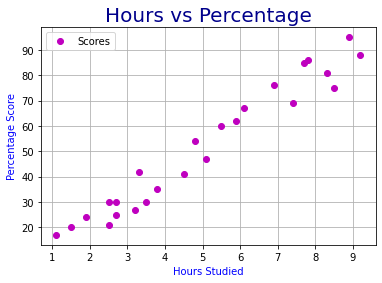

In [ ]:
pdl.plot(x='Hours', y='Scores', style='o',color="m")  
plt.xlabel('Hours Studied',fontsize=10,color="b")  
plt.ylabel('Percentage Score',fontsize=10,color="b")
plt.title('Hours vs Percentage',fontsize=20,color="DarkBlue")  
plt.grid()
plt.show()

`There is a positive linear relation between the number of hours studied and percentage of score.`

#Boxplot of the data

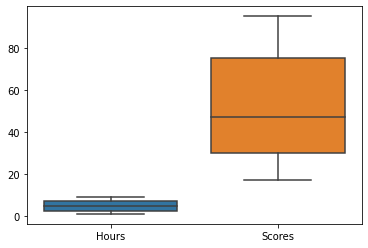

In [ ]:
sns.boxplot(data=pdl[["Hours","Scores"]])

#Preparing the data

In [ ]:
X = pdl.iloc[:, :-1].values  
y = pdl.iloc[:, 1].values  

#Splitting data into TEST and TRAIN

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


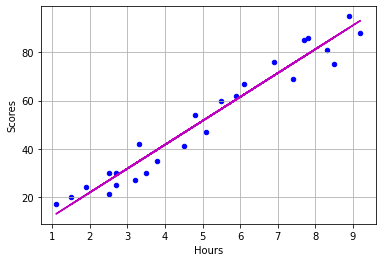

In [ ]:
line = regressor.coef_*X+regressor.intercept_
pdl.plot.scatter(x="Hours", y="Scores",color="b")
plt.plot(X, line,color="m");
plt.grid()
plt.show()

### **Making Predictions**

In [ ]:
#Predicting scores
y_pred = regressor.predict(X_test) 
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Predicting score of a student who studies for 9.25 hrs/day
hours= np.array([[9.25]])
s_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(s_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**


In [ ]:
import sklearn.metrics as metrics

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print('Explained Variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Explained Variance:  0.9483
mean_squared_log_error:  0.0185
r2:  0.9455
MAE:  4.1839
MSE:  21.5988
RMSE:  4.6474
